In [1]:
#Setting up imports
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Define the parameters here:
Nmics = 64
Nsamp = 200
dist_per_samp = 0.1
pitch = 0.1
c = 0.5
time_per_samp = dist_per_samp/c
SincP = 5.0
src = (0, 0)
obstacle = (3, -1)

In [3]:
def mic_locs(pitch, Nmics):
    # If there are an even number of mics, there is no mic at origin.
    if Nmics%2==0:
        # The mics are located at integral multiples of the pitch 
        micl = [(0, pitch*i) for i in range(1, (Nmics//2)+1)]
        micr = [(0, -pitch*i) for i in range(1, (Nmics//2)+1)][::-1]
        return np.array(micr+micl)
    else:
        temp = Nmics-1
        micl = [(0, pitch*i) for i in range(1, (Nmics//2)+1)]
        micr = [(0, -pitch*i) for i in range(1, (Nmics//2)+1)][::-1]
        return np.array(micr + [(0, 0)] + micl) # Placing the extra mic at origin
def dist(src, pt, mic):
    d1 = ((src[0]-pt[0])**2 + (src[1]-pt[1])**2)**0.5
    d2 = ((pt[0]-mic[0])**2 + (pt[1]-mic[1])**2)**0.5
    return d1+d2
def wsrc(t):
    return np.sinc(SincP*t)
def sig_gen(Nmics, Nsamp, time_per_samp, src, obstacle):
    mics = mic_locs(pitch, Nmics)
    t_samps = np.linspace(0, Nsamp*time_per_samp, Nsamp)
    mic_output = np.array([np.zeros(len(t_samps)) for _ in range(Nmics)])
    for i in range(Nmics): # For each mic..
        delay = dist(src, obstacle, mics[i])/c # Finding the delay time
        mic_output[i] = wsrc(t_samps - delay) # Calulating the shifted sinc waveform
        plt.plot(t_samps, mic_output[i]+mics[i][1])
    return mic_output, t_samps # returning the outputs of the mics
def raster(mic_output):
    plt.imshow(mic_output) # Plotting the heat plot
    plt.title(f"Nmics = {len(mic_output)}, Nsamp = {len(mic_output[0])}") 
    # plt.title(f"c={c}")
    plt.show()
def reconstruction(mic_output, mics, Nmics, t_samps, time_per_samp, Nsamp):
    reconstr = np.array([np.zeros(len(t_samps)) for _ in range(Nmics)])
    # Creating the grid
    y_grd = np.array([mics[i][1] for i in range(len(mics))])
    x_grd = np.array([i*time_per_samp for i in range(Nsamp)])
    for i in range(len(x_grd)):
        for j in range(len(y_grd)): # For all points on the grid..
            for k in range(Nmics): # and for all mics..
                t = dist(src, (c*x_grd[i], y_grd[j]), mics[k])/c # Calculate the delay
                if t < Nsamp * time_per_samp:
                    reconstr[j][i] += mic_output[k][int(t/time_per_samp)] # Append to the reconstr matrix.
    return reconstr

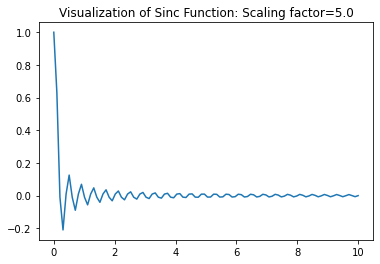

In [4]:
x = np.linspace(0, 10, 100)
y = wsrc(x)
plt.title(f"Visualization of Sinc Function: Scaling factor={SincP}")
plt.plot(x, y)
plt.show()

Generation of expected mic output for the given obstacle


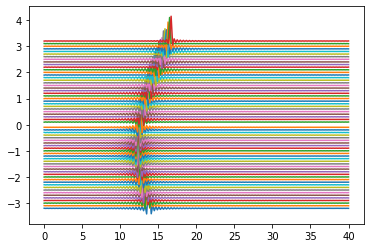

In [5]:
mics = mic_locs(pitch, Nmics)
mic_output, t_samps = sig_gen(Nmics, Nsamp, time_per_samp, src, obstacle)
print("Generation of expected mic output for the given obstacle")

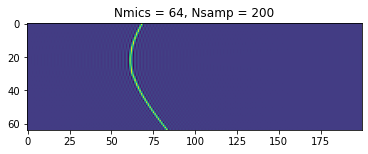

In [6]:
raster(mic_output)

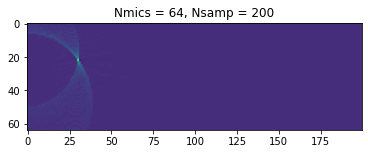

Expected location of obstacle


In [7]:
reconstr = reconstruction(mic_output, mics, Nmics, t_samps, time_per_samp, Nsamp)
raster(reconstr)
print("Expected location of obstacle")

In [8]:
ob1 = np.loadtxt('rx2.txt')

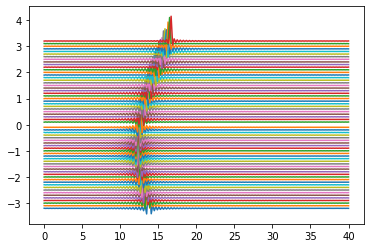

In [9]:
Nmics = 64
Nsamp = 200
pitch = 0.1
dist_per_samp = 0.1
time_per_samp = dist_per_samp/c
C = 0.5
time_per_samp = dist_per_samp/c
mics = mic_locs(pitch, Nmics)
mic_output, t_samps = sig_gen(Nmics, Nsamp, time_per_samp, src, obstacle)
del mic_output

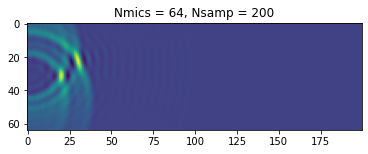

In [10]:
reconstr = reconstruction(ob1, mics, Nmics, t_samps, time_per_samp, Nsamp)
raster(reconstr)

In [11]:
ob2 = np.loadtxt('rx3.txt')

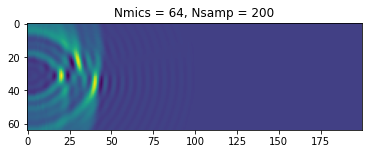

In [12]:
reconstr = reconstruction(ob2, mics, Nmics, t_samps, time_per_samp, Nsamp)
raster(reconstr)